In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.cluster import KMeans

In [73]:
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [74]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Carregando o DataFrame

Para carregar o DataFrame, você deve colocar o arquivo csv "VIAGENS.csv" na pasta 'copper-etl' e depois copiar o caminho em 'Copy Path'.



In [ ]:
file_path = r'./data/VIAGENS.csv'

df = pd.read_csv(file_path, encoding='latin1', low_memory=False)

print(df.head())

                                    ID_VIAGEM_REALIZADA  DT_OPERACIONAL  \
134599332 02/09/24 1 LINHA 7 - RUBI              A8034F              10   
134599333 02/09/24 1 LINHA 7 - RUBI              A8034F              10   
134599334 02/09/24 1 LINHA 7 - RUBI              A8034F              10   
134599335 02/09/24 1 LINHA 7 - RUBI              A8034F              10   
134599336 02/09/24 1 LINHA 7 - RUBI              A8034F              10   

                                    ID_LINHA TX_DESCR_LINHA TX_COR_LINHA  \
134599332 02/09/24 1 LINHA 7 - RUBI     F037       02/09/24     02/09/24   
134599333 02/09/24 1 LINHA 7 - RUBI     J039       02/09/24     02/09/24   
134599334 02/09/24 1 LINHA 7 - RUBI     G054       02/09/24     02/09/24   
134599335 02/09/24 1 LINHA 7 - RUBI     F029       02/09/24     02/09/24   
134599336 02/09/24 1 LINHA 7 - RUBI     G042       02/09/24     02/09/24   

                                     NR_ORDEM  TX_PREFIXO  DT_INI_VIAGEM  \
134599332 02/09/

## Preparação dos dados
Essas etapas preparam o conjunto de dados para análise, assegurando que ele esteja completo (sem nulos), consistente (com colunas tratadas e tipos de dados corretos) e único (sem duplicatas). Com o DataFrame limpo e estruturado, pode-se prosseguir com análises avançadas, como cálculo de correlações, clustering e visualizações, sem problemas de inconsistência ou dados ausentes.

In [76]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [77]:
mixed_type_cols = [col for col in df.columns if df[col].apply(type).nunique() > 1]
print("Colunas com dados mistos:", mixed_type_cols)

Colunas com dados mistos: ['ID_ORIGEM', 'ID_DESTINO', 'TX_ORIGEM', 'TX_DESTINO', 'TX_COMPOSICAO', 'ID_ORIGEM_PROG', 'TX_ORIGEM_PROG', 'ID_DESTINO_PROG', 'NR_CCO_SIC', 'NR_ANO_SIC', 'NR_DURACAO_REAL', 'TX_IPPM', 'TX_FPPM', 'TX_IPPT', 'FL_SENTIDO', 'TX_ESTACAO_ORIGEM', 'TX_ESTACAO_DESTINO']


In [78]:
for col in mixed_type_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [79]:
df[mixed_type_cols] = df[mixed_type_cols].fillna(df[mixed_type_cols].mean())


In [80]:
for col in mixed_type_cols:
    df[col] = df[col].astype(str)

In [81]:
for col in mixed_type_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])

In [82]:
print(df.dtypes)

ID_VIAGEM_REALIZADA     object
DT_OPERACIONAL           int64
ID_LINHA                object
TX_DESCR_LINHA          object
TX_COR_LINHA            object
NR_ORDEM                object
TX_PREFIXO               int64
DT_INI_VIAGEM            int64
DT_FIM_VIAGEM            int64
DT_ATUALIZA             object
NR_DURACAO              object
ID_ORIGEM               object
ID_DESTINO              object
TX_ORIGEM               object
TX_DESTINO              object
TX_COMPOSICAO           object
ID_ORIGEM_PROG          object
TX_ORIGEM_PROG          object
ID_DESTINO_PROG         object
TX_DESTINO_PROG        float64
DT_INI_VIAGEM_PROG     float64
DT_FIM_VIAGEM_PROG     float64
NR_OCORR_SIC           float64
NR_CCO_SIC              object
NR_ANO_SIC              object
NR_DURACAO_REAL         object
NR_DURACAO_PROG         object
TX_TP_GRAFICO           object
TX_TP_DIA               object
FL_CONSIDERAR           object
TX_IPPM                 object
TX_FPPM                 object
TX_IPPT 

In [83]:
df.drop_duplicates(inplace=True)
print(f"Número de linhas após remoção de duplicatas: {len(df)}")

Número de linhas após remoção de duplicatas: 50227


## Estatísticas descritivas
Esse código exibe estatísticas descritivas das colunas numéricas do DataFrame, incluindo contagem, média, desvio padrão, mínimo, máximo e quartis. Essas métricas fornecem uma visão geral da distribuição dos dados, ajudam a identificar possíveis outliers e revelam a variabilidade e centralidade dos valores, facilitando a compreensão inicial do dataset.

In [84]:
print("Estatísticas Descritivas:")
print(df.describe())

Estatísticas Descritivas:
       DT_OPERACIONAL  TX_PREFIXO  DT_INI_VIAGEM  DT_FIM_VIAGEM  \
count        50227.00    50227.00       50227.00       50227.00   
mean            45.04       45.61          44.37          42.74   
std             19.35       20.97          29.38          30.35   
min             10.00        5.00           1.00           1.00   
25%             40.00       30.00          17.00          13.00   
50%             50.00       50.00          42.00          34.00   
75%             60.00       61.00          73.00          64.00   
max             70.00       90.00         111.00         111.00   

       TX_DESTINO_PROG  DT_INI_VIAGEM_PROG  DT_FIM_VIAGEM_PROG  NR_OCORR_SIC  \
count         50227.00            50227.00            50227.00      50227.00   
mean          13217.09              132.06              439.87         45.29   
std              86.13               12.34               43.19          3.60   
min               1.00                1.00        

## Insights Gerais sobre Outliers
**Outliers Frequentes:** Diversas colunas apresentam outliers significativos, indicando que há registros que se desviam do comportamento comum. Esses outliers podem representar eventos atípicos, erros de entrada de dados ou condições especiais.
**Variabilidade nas Distribuições:** Algumas colunas têm distribuição mais concentrada, enquanto outras apresentam maior dispersão, o que sugere que variáveis como NR_OCORR_SIC e TX_FPPT podem estar sujeitas a variações significativas no contexto operacional.

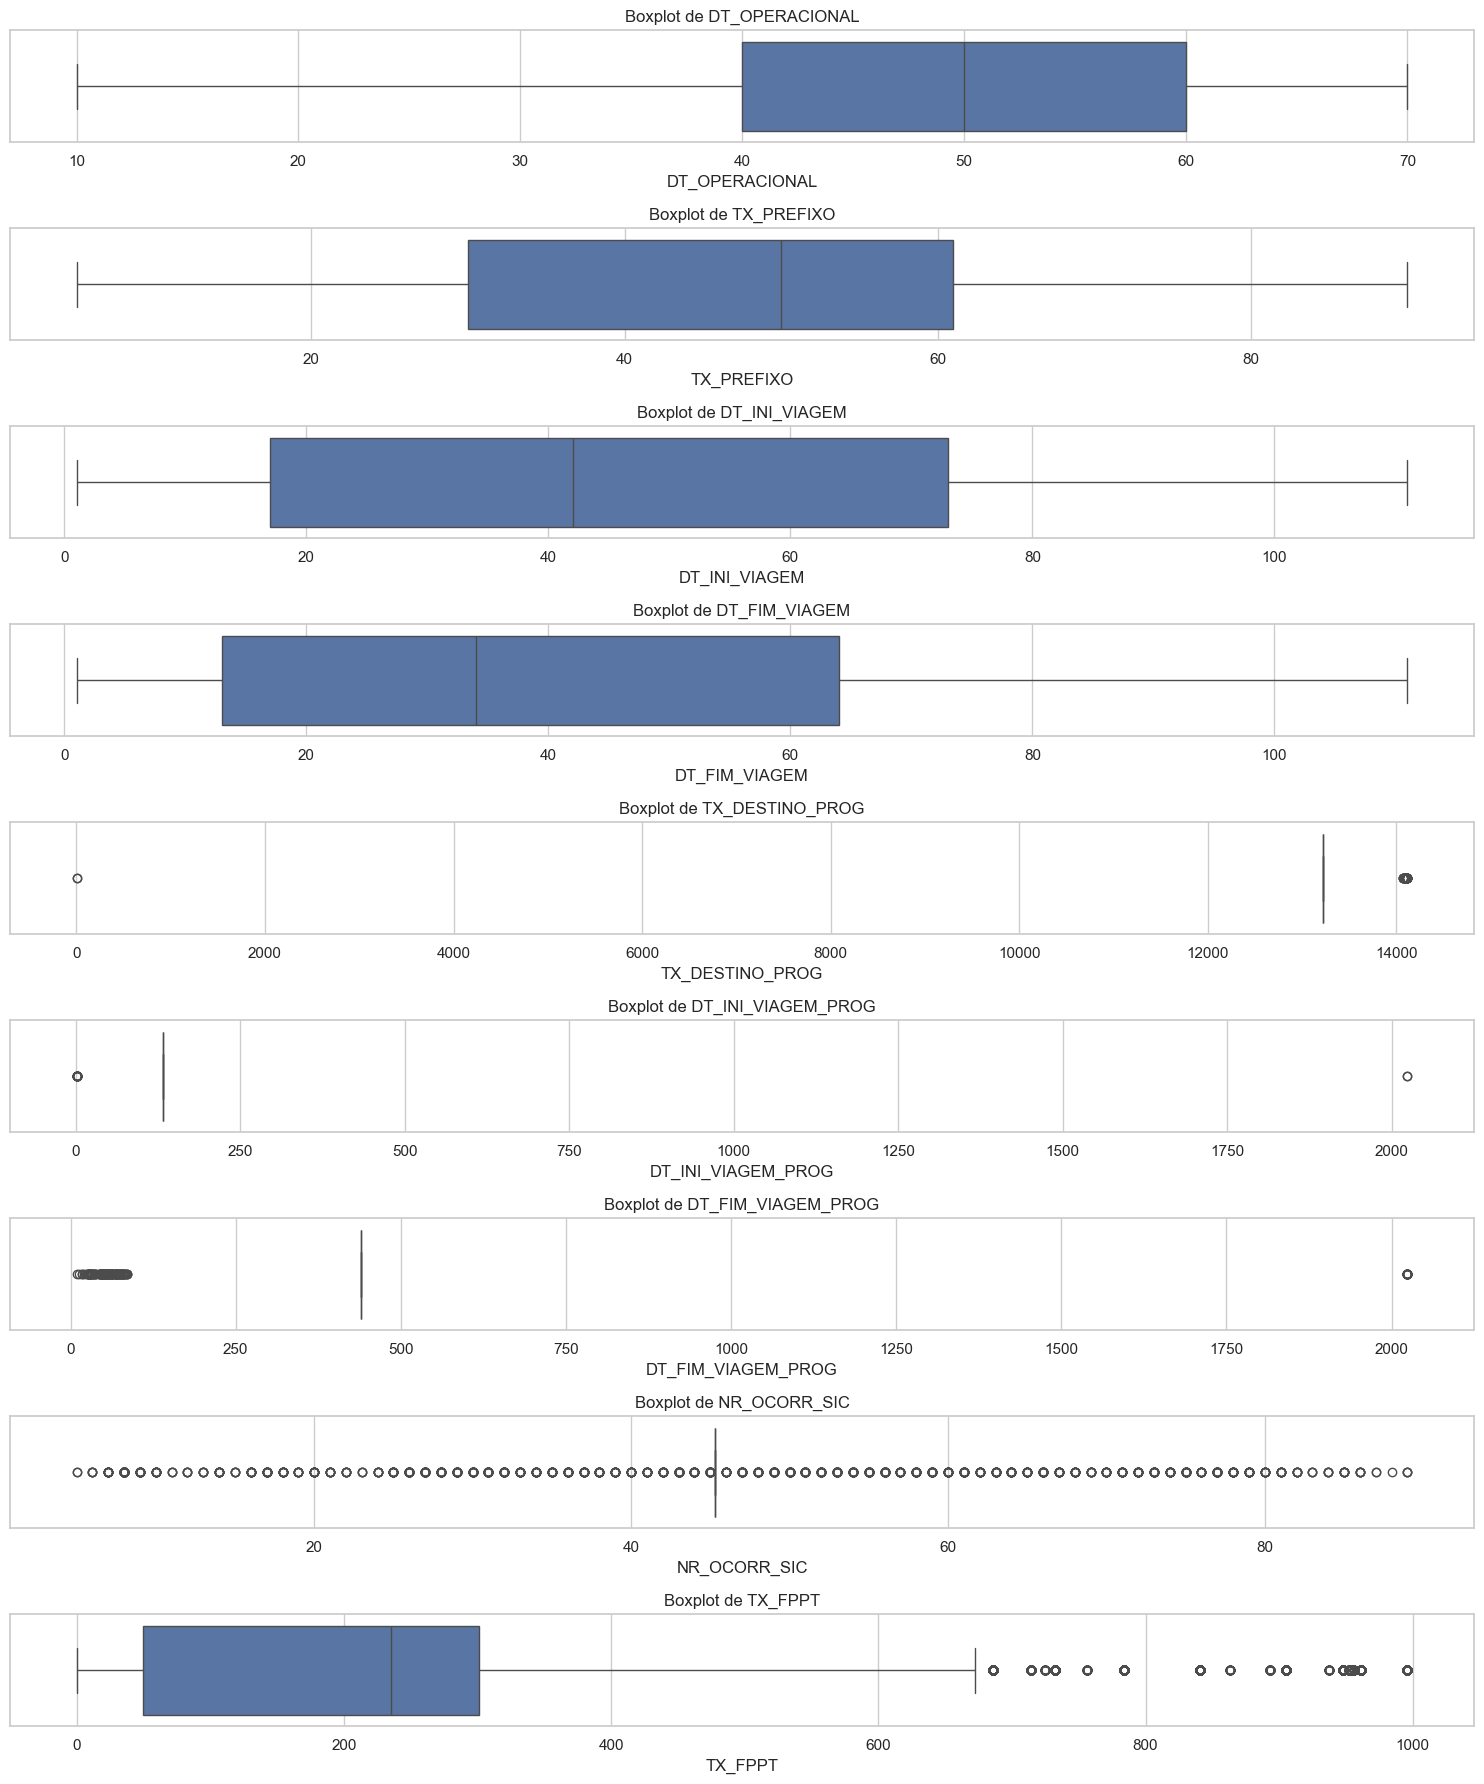

In [85]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, len(numeric_columns) * 2))  
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

## Matrizes de Correlação

Este código gera e exibe múltiplas matrizes de correlação para o DataFrame, utilizando métodos variados (Pearson, Spearman e Kendall) e diferentes seleções de colunas. Essas matrizes ajudam a identificar relações entre variáveis numéricas e possibilitam uma análise comparativa entre diferentes tipos de correlação, destacando padrões e possíveis insights sobre o comportamento dos dados.

### Matriz de Correlação geral

A matriz de correlação mostra a relação entre variáveis numéricas, com valores entre -1 (correlação negativa) e 1 (correlação positiva).

**Principais Pontos:**

**Correlação forte negativa (-1.0):** Entre TX_DESTINO_PROG e DT_INI_VIAGEM_PROG, indicando que essas variáveis se movem em direções opostas consistentemente.
Correlação moderada negativa (-0.51): Entre DT_OPERACIONAL e TX_PREFIXO, sugerindo uma relação inversa.

**Correlação fraca:** A maioria das variáveis apresenta correlações fracas ou próximas de zero, indicando independência ou relações complexas.

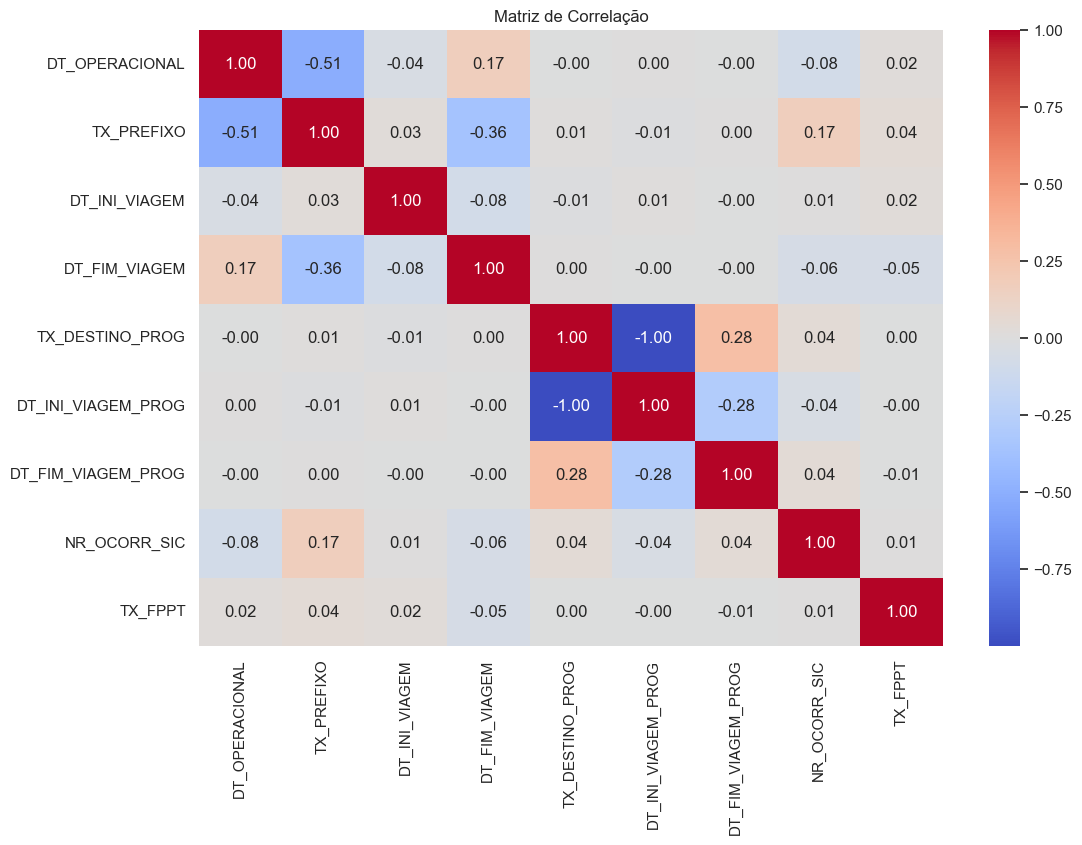

In [86]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


Esse código seleciona colunas numéricas do DataFrame e define uma função para plotar a matriz de correlação em um heatmap. 

In [87]:
numeric_df = df.select_dtypes(include=[np.number])

def plot_correlation_matrix(corr_matrix, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(title)
    plt.show()

### Matriz de Correlação Pearson

**Relação entre Destino e Horários de Viagem:**

A forte correlação negativa entre TX_DESTINO_PROG e DT_INI_VIAGEM_PROG sugere que o destino programado de uma viagem influencia o horário de partida. Isso pode indicar que certos destinos têm horários preferenciais, o que, por sua vez, pode impactar o fluxo de pessoas em diferentes horários do dia. Por exemplo, destinos de maior demanda podem ter mais partidas durante horários de pico, o que poderia atrair um maior fluxo de passageiros.

**Duração da Viagem e Previsibilidade:**

Variáveis como NR_DURACAO_REAL e NR_DURACAO_PROG podem ser exploradas para entender a precisão do tempo de viagem e como ela afeta o fluxo de pessoas. Se houver uma discrepância entre o tempo real e o programado, isso pode influenciar a percepção dos passageiros quanto à confiabilidade, afetando o fluxo ao longo do tempo. Um serviço pontual tende a atrair mais passageiros, especialmente em horários de pico.

**Prefixos e Operações em Dias Específicos:**

A correlação moderada negativa entre DT_OPERACIONAL e TX_PREFIXO sugere que prefixos específicos podem estar relacionados a dias de operação. Isso poderia significar que certos trens ou serviços operam em horários ou dias específicos, possivelmente refletindo variações no fluxo de passageiros conforme a demanda (ex., finais de semana versus dias de semana).

**Destinos Programados e Fluxo:**

A correlação positiva entre TX_DESTINO_PROG e DT_FIM_VIAGEM_PROG indica que o destino de uma viagem pode estar ligado ao horário de término programado, o que pode sugerir que viagens para destinos específicos tendem a seguir uma estrutura temporal. Esse tipo de previsibilidade é importante para gerenciar o fluxo de passageiros, pois permite ajustar horários de acordo com a demanda esperada para determinados destinos.


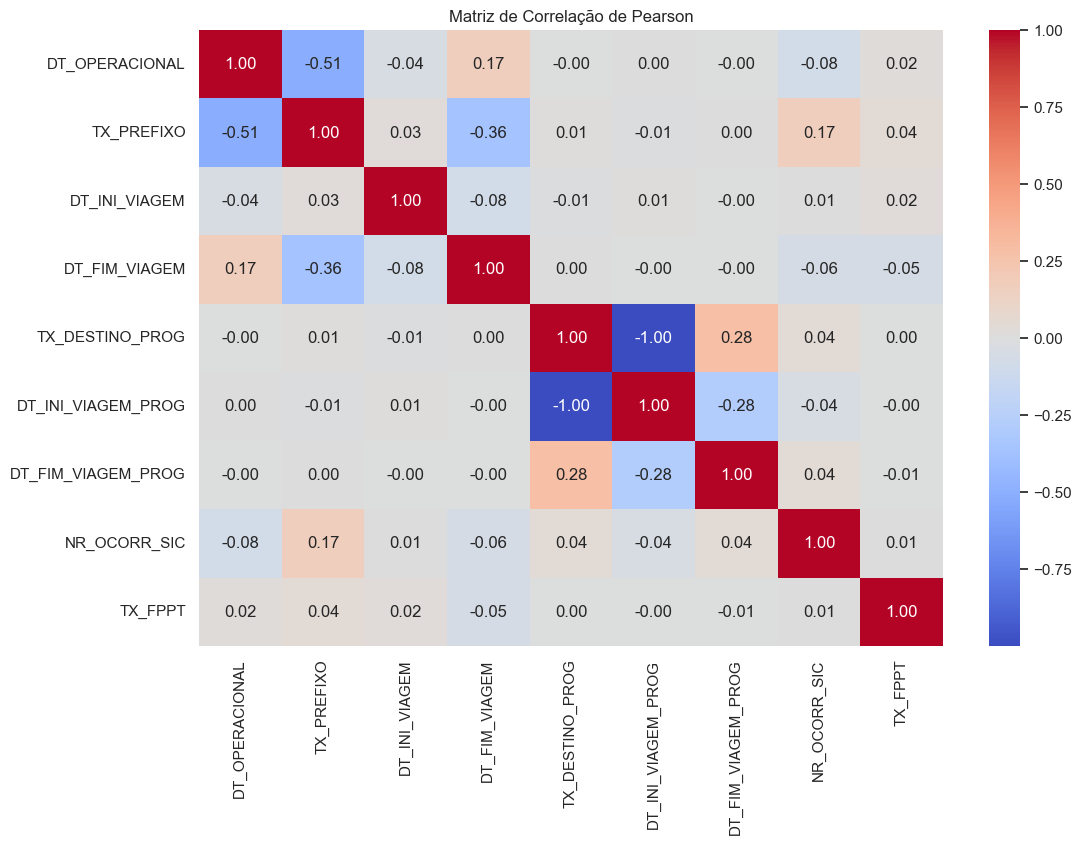

In [88]:
pearson_corr = numeric_df.corr(method='pearson')
plot_correlation_matrix(pearson_corr, "Matriz de Correlação de Pearson")

### Matriz de Correlação Spearman

**Sincronização entre Destino e Horário de Término de Viagem:**

A correlação moderada entre TX_DESTINO_PROG e DT_FIM_VIAGEM_PROG (0.46) indica que, para alguns destinos, há uma previsão de término de viagem que pode ser ajustada para atender ao fluxo de passageiros. Isso permite uma gestão mais eficaz do fluxo de pessoas, pois viagens que têm horários de término consistentes podem ajudar na organização e distribuição de passageiros, especialmente durante horários de maior demanda.

**Impacto da Ocorrência e Prefixo no Fluxo de Pessoas:**

A relação leve entre TX_PREFIXO e NR_OCORR_SIC (0.15) sugere que alguns prefixos de trem podem estar associados a um número específico de ocorrências. Ocorrências operacionais (como falhas ou atrasos) impactam diretamente o fluxo de pessoas, pois afetam a pontualidade e a frequência dos trens, aumentando a concentração de passageiros nas estações. Prefixos com maior incidência de ocorrências podem exigir ajustes operacionais para manter o fluxo de passageiros.

**Horário de Término e Indicador TX_FPPT:**

A correlação fraca negativa entre DT_FIM_VIAGEM e TX_FPPT (-0.25) pode indicar que, em viagens que terminam em horários mais tardios, há uma ligeira redução no indicador operacional TX_FPPT, possivelmente associado ao fluxo de passageiros mais baixo em horários não-pico. Este insight pode ser útil para planejar ajustes na frequência e no tamanho dos trens de acordo com o fluxo esperado.

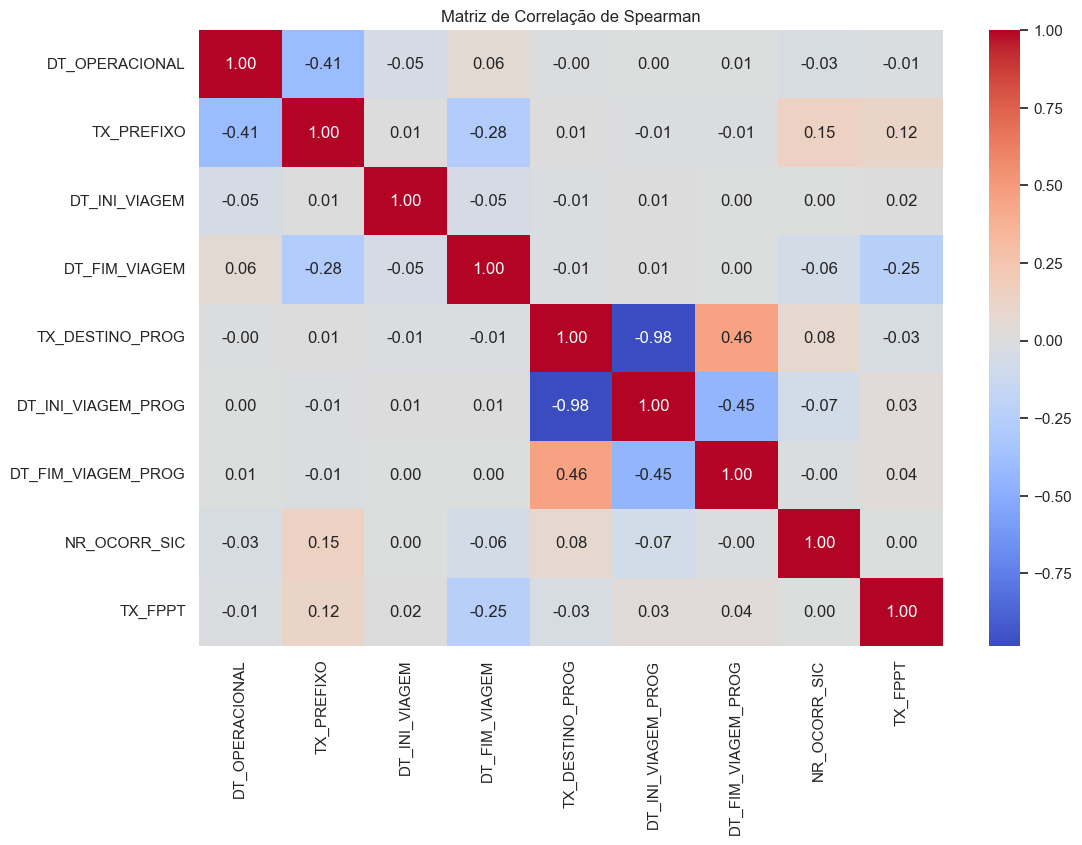

In [89]:
spearman_corr = numeric_df.corr(method='spearman')
plot_correlation_matrix(spearman_corr, "Matriz de Correlação de Spearman")

### Matriz de Correlação Kendall

**Principais Insights e Relações com o Fluxo de Pessoas**

**Correlação Negativa entre TX_DESTINO_PROG e DT_INI_VIAGEM_PROG (-0.98):**

Esta forte correlação negativa indica que, à medida que o destino programado (TX_DESTINO_PROG) aumenta, o horário de início de viagem programado (DT_INI_VIAGEM_PROG) tende a diminuir de forma consistente. Para o fluxo de pessoas, isso pode significar que destinos específicos têm horários de partida regulares, facilitando a programação do fluxo de passageiros para esses locais. Por exemplo, áreas com maior demanda podem ter horários de início específicos durante períodos de pico.

**Correlação Moderada entre TX_DESTINO_PROG e DT_FIM_VIAGEM_PROG (0.46):**

Uma correlação moderada positiva entre o destino programado e o horário final da viagem sugere que viagens para determinados destinos têm previsibilidade de término. Isso pode ajudar a organizar o fluxo de passageiros, já que destinos programados com horários de fim consistentes possibilitam ajustar o planejamento para otimizar o tempo de retorno dos trens e evitar superlotação em horários de pico.

**Correlação Negativa entre DT_FIM_VIAGEM e TX_FPPT (-0.13):**

Embora seja uma correlação fraca, a relação negativa sugere que, à medida que o horário de término da viagem aumenta, o indicador operacional TX_FPPT tende a diminuir. Para o fluxo de pessoas, isso pode indicar que viagens que se estendem em horários mais tardios têm um impacto no desempenho operacional, possivelmente relacionado à menor demanda de passageiros fora dos horários de pico.

**Correlação Fraca entre TX_PREFIXO e NR_OCORR_SIC (0.12):**

Essa leve correlação positiva indica que alguns prefixos de trens podem estar associados a uma maior frequência de ocorrências operacionais (NR_OCORR_SIC). Ocorrências operacionais, como falhas ou atrasos, podem ter um impacto direto no fluxo de passageiros, especialmente se resultarem em aglomeração nas estações devido a atrasos.

**Conclusões Relacionadas ao Fluxo de Pessoas**

1. Previsibilidade e Planejamento de Viagens: A forte correlação entre destino e horário de início de viagem programado permite uma programação que pode ser adaptada à demanda de passageiros. Horários regulares para destinos populares facilitam o controle do fluxo, especialmente em horários de pico.

2. Otimização do Tempo de Retorno e Fim de Viagem: Destinos com horários de término previsíveis ajudam a planejar o fluxo de trens e reduzir a sobrecarga nas estações, pois os trens podem voltar para os pontos de origem conforme o cronograma esperado.

3. Impacto Operacional e Desempenho: Ocorrências operacionais, mesmo que com uma correlação fraca, podem afetar a experiência dos passageiros, gerando atrasos e acúmulo nas estações.



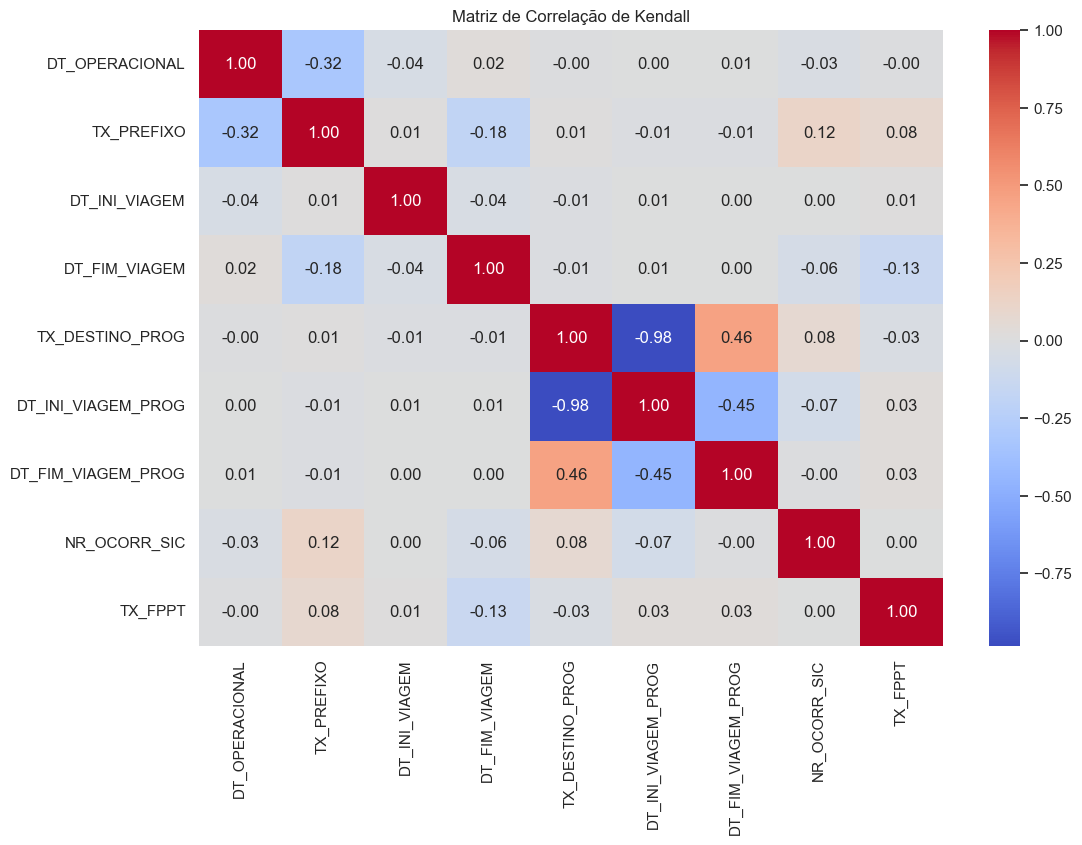

In [90]:
kendall_corr = numeric_df.corr(method='kendall')
plot_correlation_matrix(kendall_corr, "Matriz de Correlação de Kendall")

### Matriz de Correlação para colunas selecionadas

**Correlação entre NR_LOCAL_ORIGEM e TX_FPPT (0.12):**

Uma correlação positiva muito fraca, sugerindo uma relação mínima entre o local de origem e o indicador TX_FPPT. Isso pode indicar que o local de partida exerce pouco efeito sobre esse indicador.

**Correlação entre TX_IPPM e TX_FPPM (0.25):**

Correlação positiva moderada, o que pode sugerir que esses dois indicadores de performance (provavelmente relacionados ao funcionamento ou pontualidade do sistema) tendem a variar em conjunto.

**Correlação fraca entre TX_IPPT e TX_FPPT (-0.14):**

Correlação fraca negativa, indicando que, conforme TX_IPPT aumenta, TX_FPPT tende a diminuir ligeiramente. Isso pode refletir uma relação operacional, mas de baixo impacto.

**Baixa Interdependência nas Demais Variáveis:**

A maioria das variáveis exibe correlações próximas de zero entre si, indicando que elas são amplamente independentes ou têm uma relação muito fraca.

**Conclusões sobre o Fluxo de Pessoas**

1. Indicadores Operacionais: As variáveis como TX_IPPM, TX_FPPM, TX_IPPT, e TX_FPPT parecem ser relativamente independentes das variáveis de localização e duração, sugerindo que o desempenho do sistema não está fortemente ligado a locais ou durações específicas.

2. Planejamento de Viagens: As correlações mínimas entre locais e duração indicam que o fluxo de pessoas pode não ser diretamente afetado por essas variáveis. Isso sugere que o fluxo depende mais de outros fatores não capturados aqui, como horários de pico, demanda de passageiros e capacidade dos trens.

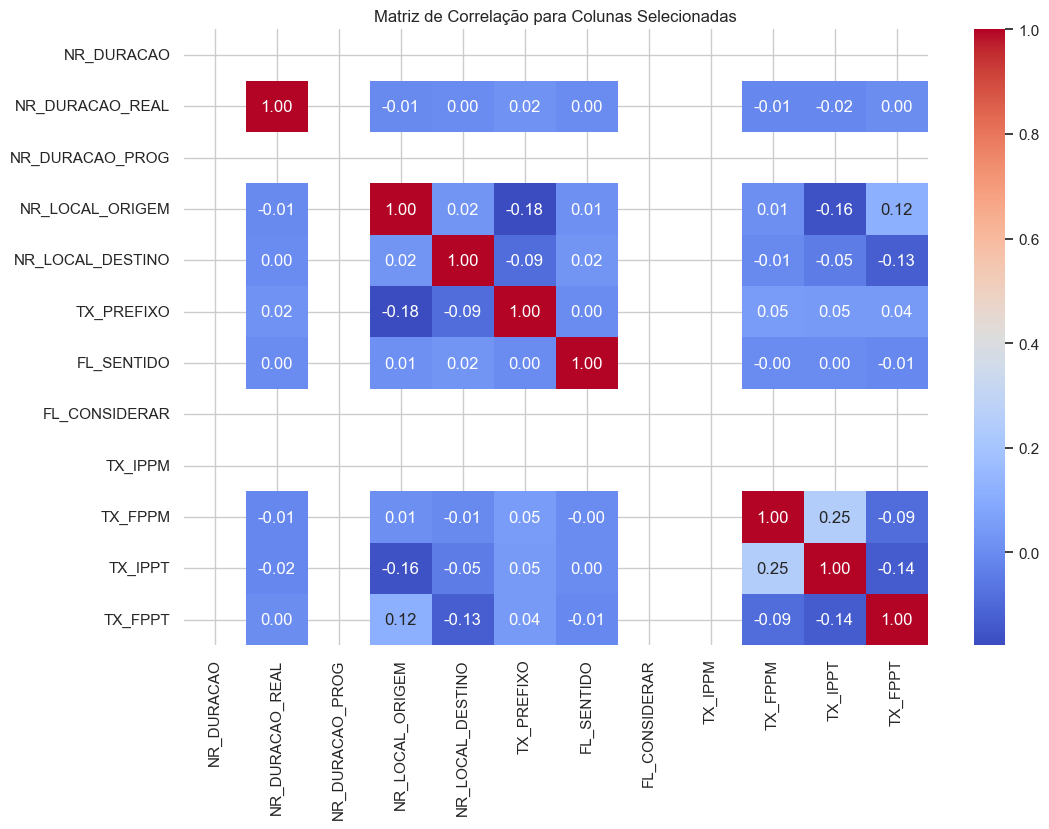

In [91]:
# Seleciona colunas de interesse para a matriz de correlação
selected_columns = [
    'NR_DURACAO', 'NR_DURACAO_REAL', 'NR_DURACAO_PROG',
    'NR_LOCAL_ORIGEM', 'NR_LOCAL_DESTINO', 'TX_PREFIXO',
    'FL_SENTIDO', 'FL_CONSIDERAR', 'TX_IPPM', 'TX_FPPM', 'TX_IPPT', 'TX_FPPT'
]

# Cria um DataFrame apenas com as colunas selecionadas e converte categorias para numéricas
correlation_df = df[selected_columns].copy()
correlation_df = correlation_df.apply(pd.to_numeric, errors='coerce')

# Calcula a matriz de correlação
correlation_matrix = correlation_df.corr()

# Exibe a matriz de correlação com um heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação para Colunas Selecionadas")
plt.show()


## Análise de Componentes Principais (PCA)

A análise de componentes principais (PCA) resultou no gráfico de dispersão abaixo, onde os dados foram reduzidos a duas dimensões principais. Aqui estão os principais insights:

**Interpretação do Gráfico**
**Distribuição dos Pontos:** A maioria dos dados está concentrada em torno do eixo vertical (próximo a 0 no Componente Principal 1), enquanto alguns pontos se destacam, indicando possíveis outliers ou observações que são diferentes em termos das variáveis analisadas.

**Variação dos Dados:** A dispersão na direção do Componente Principal 1 sugere que algumas observações são muito diferentes das demais, o que pode ser investigado para entender se representam casos específicos ou anomalias.

**Variância Explicada**
1. Componente Principal 1: Explica 23.8% da variância dos dados.
2. Componente Principal 2: Explica 19.6% da variância dos dados.
3. Variância Total Explicada: 43.5% com os dois componentes.

Essa variância total explicada de 43.5% indica que esses dois componentes capturam menos da metade da informação presente nos dados originais. Isso sugere que os dados têm uma estrutura complexa e podem exigir mais componentes para capturar a maioria da variabilidade.

**Conclusão**
1. Interpretação Limitada: Embora o PCA reduza a dimensionalidade e facilite a visualização, ele não captura totalmente a complexidade dos dados. Isso pode indicar a necessidade de mais componentes para uma representação mais precisa ou sugerir que outras variáveis influenciam a variabilidade.

2. Exploração de Outliers: Os pontos fora do padrão observados no Componente Principal 1 podem ser investigados para identificar fatores que diferenciam essas observações.

Essa análise serve como um ponto inicial para entender a distribuição e a variabilidade dos dados, mas não fornece uma explicação completa devido à variância limitada capturada.

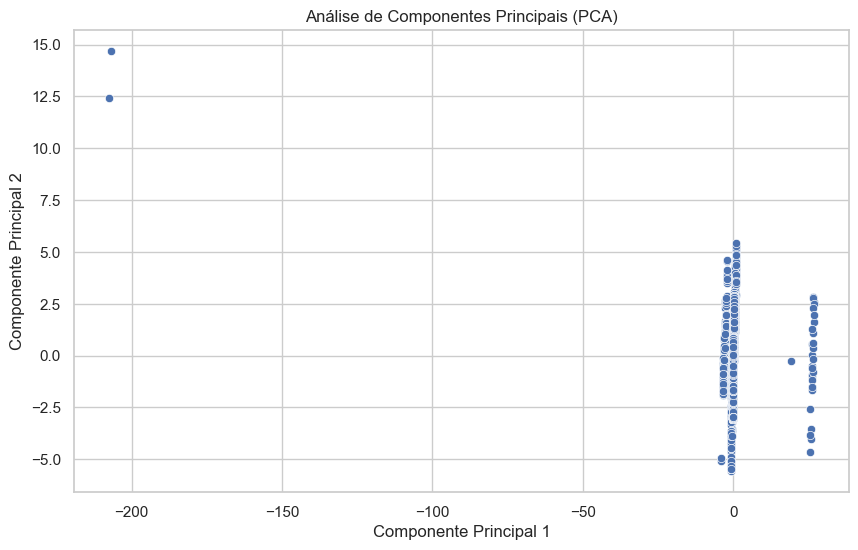

Variância explicada por cada componente principal: [0.23839846 0.19636678]
Variância total explicada: 0.43476523611942675


In [92]:
numeric_df = df.select_dtypes(include=[np.number]).fillna(0)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

pca = PCA(n_components=2)  
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_data, columns=['Componente 1', 'Componente 2'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Componente 1', y='Componente 2', data=pca_df)
plt.title("Análise de Componentes Principais (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

print("Variância explicada por cada componente principal:", pca.explained_variance_ratio_)
print("Variância total explicada:", sum(pca.explained_variance_ratio_))

## Método do Cotovelo 

**Inércia:** A inércia representa a soma das distâncias ao quadrado entre cada ponto e o centroide do cluster ao qual pertence. Quanto menor a inércia, mais compactos são os clusters.

**Identificação do Cotovelo:** O ponto onde a taxa de redução da inércia começa a diminuir significativamente é conhecido como o "cotovelo". Esse ponto indica o número ideal de clusters, pois adicionar mais clusters além desse ponto não traz uma grande melhoria na compactação dos dados, apenas aumenta a complexidade do modelo.

**Cotovelo:** No gráfico, o "cotovelo" parece estar em torno de 4 a 6 clusters, onde a redução da inércia começa a se estabilizar. Esse intervalo é sugerido como o número ideal de clusters para agrupar os dados, proporcionando um equilíbrio entre compactação dos clusters e simplicidade do modelo.

**Conclusão**

Número Ideal de Clusters: Com base no gráfico, o número ideal de clusters para essa análise parece estar em torno de 4 a 6.

In [93]:

# Seleciona colunas numéricas para clustering
numeric_df = df.select_dtypes(include=[np.number]).fillna(0)

# Padroniza os dados numéricos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Determina o número ideal de clusters usando o método do cotovelo
inertia = []
cluster_range = range(1, 11)  # Tentativa com 1 a 10 clusters

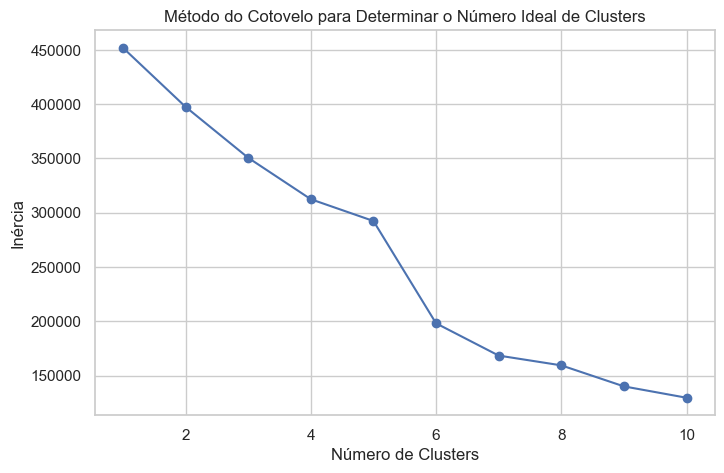

In [94]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plota o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinar o Número Ideal de Clusters')
plt.show()

## Clusters gerados pelo K-Means

**Interpretação dos Clusters**

**Clusters Distintos:**

Cada cor representa um cluster diferente (0, 1 e 2), que corresponde a agrupamentos distintos nos dados.
A concentração dos pontos em uma área próxima ao eixo vertical indica que a maioria das observações está agrupada nessa região, enquanto alguns pontos isolados aparecem à esquerda, sugerindo possíveis outliers ou observações que diferem do restante.

**Distribuição dos Clusters:**

A presença de pontos amarelos (Cluster 2) e roxos (Cluster 0) próximos ao eixo zero do Componente Principal 1, junto com a dispersão do Cluster 1 (verde), indica que os clusters podem ter sobreposição em algumas regiões, sugerindo que eles compartilham características semelhantes.

**Outliers:**

Dois pontos estão significativamente afastados na direção negativa do Componente Principal 1. Esses pontos podem representar observações únicas ou anômalas que não se encaixam bem em nenhum dos clusters principais, e podem requerer uma análise mais aprofundada.

**Conclusão**

Essa visualização indica que o K-Means conseguiu dividir os dados em grupos distintos, mas com uma possível sobreposição. As áreas de concentração e os pontos dispersos (outliers) fornecem insights sobre as diferentes características dos clusters e podem guiar uma análise mais aprofundada para entender o comportamento de cada grupo.

In [95]:
# Reinicialize o índice para evitar problemas de alinhamento
df = df.reset_index(drop=True)

# Executa o K-Means após determinar o número de clusters ideal
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Adiciona a coluna de clusters ao DataFrame original
df['Cluster'] = clusters

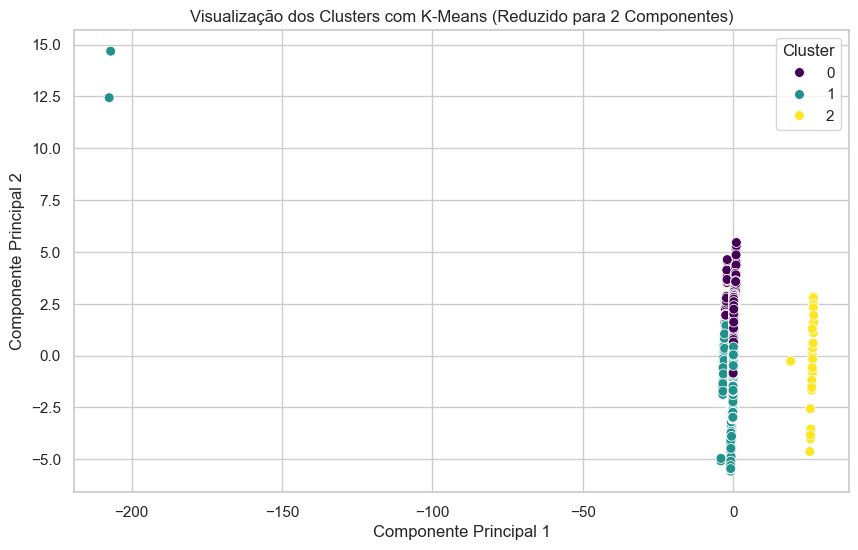

In [96]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=['Componente 1', 'Componente 2'])
pca_df['Cluster'] = df['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Componente 1', y='Componente 2', hue='Cluster', palette='viridis', s=50)
plt.title('Visualização dos Clusters com K-Means (Reduzido para 2 Componentes)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()